In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np

In [31]:
# file csv to panda

nom_du_fichier_csv = '/Users/marche/Documents/Centrale 3A/Apprentissage_Automatique_Project/Python_files/csv_files/train_bdd_clean.csv'
data = pd.read_csv(nom_du_fichier_csv)

In [32]:
#choose here the label you want to train for among the following list;["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"]:

label = "prct_cause_gestion_trafic"


data_prct = (
    data.copy()
        .drop(
            ["prct_cause_infra","prct_cause_gestion_trafic","prct_cause_materiel_roulant","prct_cause_prise_en_charge_voyageurs","prct_cause_externe","prct_cause_gestion_gare"],
            axis=1,
        )
    )

y = data[label]
X = data_prct

# Diviser le jeu de données en ensembles d'entraînement et de test

separation_date = 2023

# Masque pour les données de test (annee == 2023)
test_mask = (data['annee'] == separation_date)

# Masque pour les données d'entraînement (annee < 2023)
train_mask = (data['annee'] < separation_date)

# Séparez les données en ensembles d'entraînement et de test
X_train = data_prct[train_mask]
y_train = y[train_mask]
X_test = data_prct[test_mask]
y_test = y[test_mask]

In [33]:
#correlation entre les features et le label sélectionné:

correlation_matrix = X.corrwith(y)

pd.set_option('display.max_rows', None)

# Afficher le vecteur de corrélation
abs_mat = correlation_matrix.abs()

sorted_correlation = abs_mat.sort_values(ascending=False)

print(sorted_correlation)

ARRIVEE_PARIS EST                         0.192597
Longitude_depart                          0.192167
nb_de_voies_arrivee                       0.172458
DEPART_PARIS LYON                         0.139987
nb_train_depart_retard                    0.139186
Latitude_arrivee                          0.139063
retard_moyen_arrivee                      0.134840
nb_train_retard_arrivee                   0.130915
ARRIVEE_PARIS NORD                        0.118249
DEPART_FRANCFORT                          0.117448
Distance (km)                             0.114356
nb_de_voies_depart                        0.107943
DEPART_METZ                               0.102298
DEPART_DOUAI                              0.097811
DEPART_STUTTGART                          0.095801
ARRIVEE_FRANCFORT                         0.095486
DEPART_ITALIE                             0.091895
mois                                      0.089458
DEPART_CHAMBERY CHALLES LES EAUX          0.087159
retard_moyen_trains_retard_sup1

In [34]:
# pipeline
random_forest_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle
    ('regressor', RandomForestRegressor())  # Utilisez RandomForestRegressor comme modèle de régression
])

210.00541614398668
178.60535730508994
162.0023372811213
162.53959305671657
212.79009709921937
216.82671572156798
162.0446219610977
148.89292618973514
147.63311755943525
152.69298580854888
151.97093502413827
151.0825330357467
150.5859385076798
150.75298307294716
150.42237236153497
149.65003564924947
149.3987371964754
168.65964560220317
163.46732581148015
163.0297494222186
159.04224773489702
162.40111488115002
163.45112317708495
165.1462310735931
160.04340547068284
160.01124785358238
161.31350268674043
160.06186915767395
156.39639189222532
158.39926763880177
159.74486531154363
162.74362885532372
158.97251818699723
162.5212183698699
160.16888025437964
164.83677467614743
160.85500152538654
162.52597073150173
163.74569588427494
163.4617508401931
164.14579148802767
164.65220634155327
167.19990880886286
163.10642406447408
164.70812689541876
165.47821532256728
167.6177423644646
168.38522276270285
163.86784342734813
165.8315841533529
161.73881663463956
166.62163929139945
169.39815390279725
163.

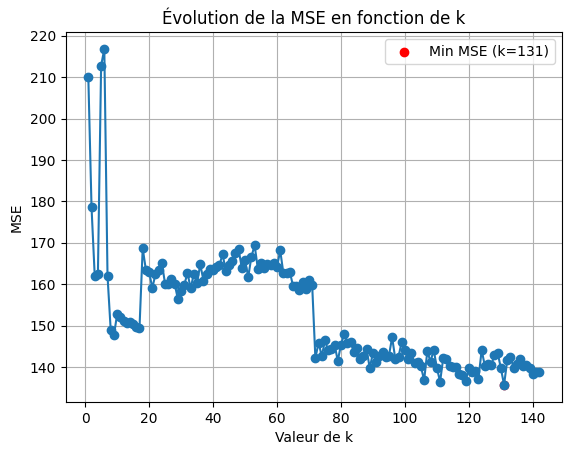

Meilleur k: 131
Meilleure MSE: 135.65179729858593


In [35]:
# Créez des listes pour stocker les scores et les valeurs de k
best_scores = []
best_ks = []
best_mse = np.inf  # Initialisez la meilleure MSE à une valeur maximale

# Créez une liste vide pour stocker les caractéristiques sélectionnées
selected_features = []

# Parcourez les noms de caractéristiques en ordre
for k in range(1, len(X.columns) + 1):
    # Ajoutez le nom de la k-ème caractéristique de sorted_correlation à la liste selected_features
    selected_features.append(sorted_correlation.index[k - 1])

    # Créez la pipeline avec les caractéristiques sélectionnées
    random_forest_regression_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Étape de mise à l'échelle
        ('regressor', RandomForestRegressor())  # Modèle de régression
    ])

    # Entraînez le modèle avec la pipeline
    random_forest_regression_pipeline.fit(X_train[selected_features], y_train)

    # Évaluez le modèle en calculant la MSE
    y_pred = random_forest_regression_pipeline.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, y_pred)

    # Mettez à jour la meilleure MSE et la meilleure valeur de k si nécessaire
    print(mse)
    if mse < best_mse:
        best_mse = mse
        best_k = k

    # Ajoutez la MSE actuelle et la valeur de k aux listes
    best_scores.append(mse)
    best_ks.append(k)

# Créez un graphique de l'évolution de la MSE en fonction de k
plt.figure()
plt.plot(best_ks, best_scores, marker='o')
plt.title("Évolution de la MSE en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("MSE")
plt.grid(True)

# Trouvez la valeur de k où la MSE est minimale
min_mse_k = best_ks[np.argmin(best_scores)]
min_mse = min(best_scores)

# Tracez un point à l'emplacement de la MSE minimale
plt.scatter(min_mse_k, min_mse, color='red', label=f'Min MSE (k={min_mse_k})')

# Affichez la légende
plt.legend()

# Affichez le graphique
plt.show()

# Affichez la meilleure valeur de k et la meilleure MSE
print("Meilleur k:", min_mse_k)
print("Meilleure MSE:", min_mse)





In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Définissez une grille d'hyperparamètres que vous souhaitez tester
param_grid = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

best_features = sorted_correlation.index[:min_mse_k]
X_best= X[best_features]


model = random_forest_regression_pipeline

# Créez l'objet GridSearchCV avec la métrique appropriée (négatif de l'erreur quadratique moyenne)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Effectuez la recherche sur grille en ajustant le modèle aux données
grid_search.fit(X_best, y)

# Obtenez les meilleurs hyperparamètres et la meilleure performance (négatif de l'erreur quadratique moyenne)
best_params = grid_search.best_params_
best_performance = -grid_search.best_score_

# Perform cross-validation on the best model
best_model = grid_search.best_estimator_
cross_val_scores = -cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Imprimez les résultats
print("Meilleurs hyperparamètres:", best_params)
print("Meilleure performance (MSE négatif):", best_performance)
print("Performances de validation croisée (MSE négatif):", cross_val_scores)
print("Moyenne des performances de validation croisée:", np.mean(cross_val_scores))


Meilleurs hyperparamètres: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Meilleure performance (MSE négatif): 188.4362311946761
Performances de validation croisée (MSE négatif): [220.70243196 200.80707778 230.93255623 140.13929076 154.90710952]
Moyenne des performances de validation croisée: 189.49769325133406


{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : 140.81


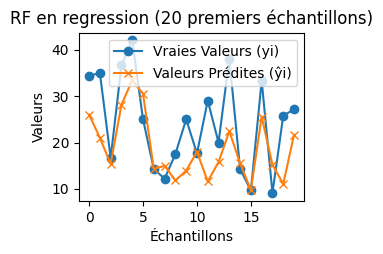

In [43]:
print(best_params)
best_params = {key.replace('regressor__', ''): value for key, value in best_params.items()}

# Créez la pipeline avec la mise à l'échelle et le modèle Random Forest Regressor en utilisant les meilleurs hyperparamètres
RF_final_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle (peut être omise si les données sont déjà normalisées)
    ('RF', RandomForestRegressor(**best_params))  # Modèle Random Forest avec les meilleurs hyperparamètres
])
RF_final_pipeline .fit(X_train, y_train)
model_final_mse = mean_squared_error(y_test, RF_final_pipeline .predict(X_test))
print(f"Erreur quadratique moyenne (MSE) du modèle Random Forest en régression : {model_final_mse:.2f}")


# Modèle Random Forest en régression
plt.subplot(222)
plt.plot(np.arange(20), y_test[:20], label="Vraies Valeurs (yi)", marker='o')
plt.plot(np.arange(20), RF_final_pipeline .predict(X_test)[:20], label="Valeurs Prédites (ŷi)", marker='x')
plt.xlabel("Échantillons")
plt.ylabel("Valeurs")
plt.title("RF en regression (20 premiers échantillons)")
plt.legend()

plt.show()